In [2]:
from google.colab import drive
drive.mount('/content/drive')
img_path = '/content/drive/My Drive/Colab Notebooks/Ch4_HR_HRV_Generation/'

Mounted at /content/drive


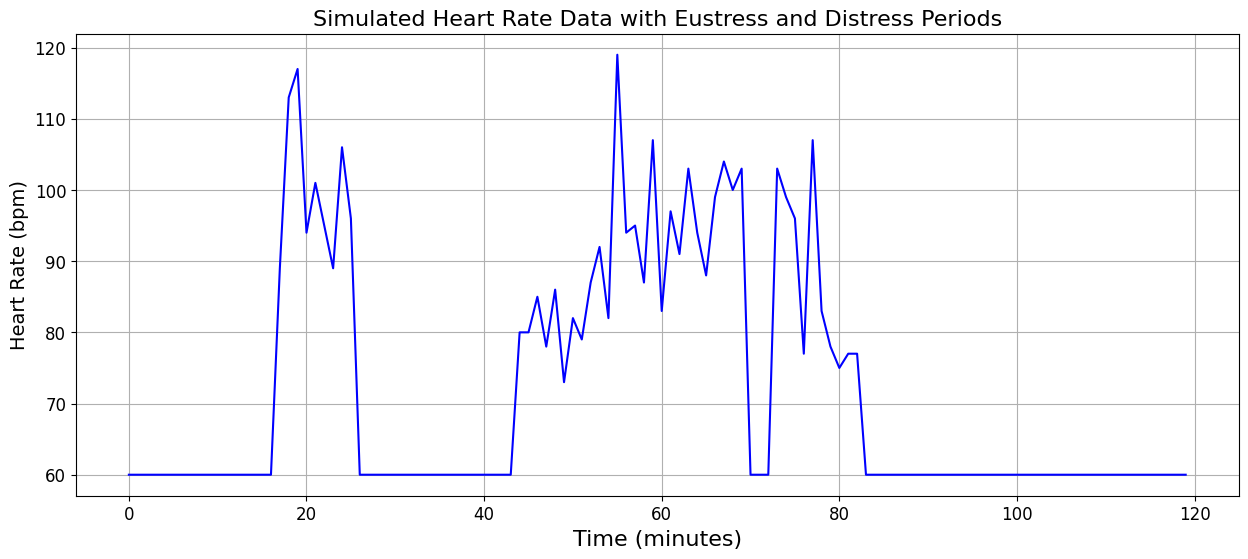

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Setting the seed for reproducibility
np.random.seed(0)

# Function to generate simulated heart rate data
def generate_heart_rate_data(duration, baseline_hr=60, eustress_hr=80, distress_hr=100):
    """
    Generates simulated heart rate data.

    :param duration: Total duration in minutes
    :param baseline_hr: Baseline heart rate (bpm)
    :param eustress_hr: Average heart rate during eustress (bpm)
    :param distress_hr: Average heart rate during distress (bpm)
    :return: Tuple of (time, heart_rates, stress_type)
    """
    time = np.arange(0, duration, 1)  # Time in minutes
    heart_rates = np.full(duration, baseline_hr)
    stress_type = np.full(duration, 'None')

    # Simulating eustress periods
    for _ in range(3):
        start = np.random.randint(0, duration - 20)
        end = start + np.random.randint(5, 20)
        heart_rates[start:end] = np.random.normal(eustress_hr, 5, end - start)
        stress_type[start:end] = 'Eustress'

    # Simulating distress periods
    for _ in range(3):
        start = np.random.randint(0, duration - 20)
        end = start + np.random.randint(5, 20)
        heart_rates[start:end] = np.random.normal(distress_hr, 10, end - start)
        stress_type[start:end] = 'Distress'

    return time, heart_rates, stress_type

# Generate heart rate data for a duration of 120 minutes
time, heart_rates, stress_type = generate_heart_rate_data(120)

# Plotting the simulated data
plt.figure(figsize=(15, 6))
plt.plot(time, heart_rates, label='Heart Rate', color='blue')
plt.fill_between(time, heart_rates, where=stress_type=='Eustress', color='green', alpha=0.3, label='Eustress')
plt.fill_between(time, heart_rates, where=stress_type=='Distress', color='red', alpha=0.3, label='Distress')
plt.xlabel('Time (minutes)', fontsize=16)
plt.ylabel('Heart Rate (bpm)', fontsize=14)
plt.title('Simulated Heart Rate Data with Eustress and Distress Periods', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()


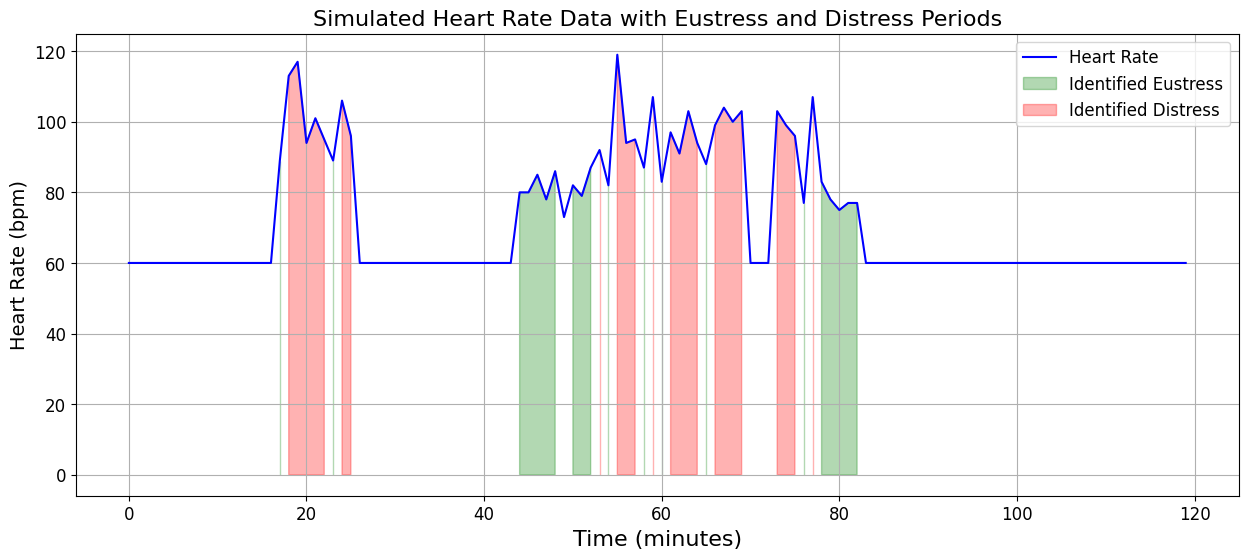

In [11]:
def analyze_heart_rate(heart_rates, baseline_hr=60, eustress_threshold=75, distress_threshold=90):
    """
    Analyzes the heart rate data to identify potential eustress and distress periods.

    :param heart_rates: Array of heart rate values
    :param baseline_hr: Baseline heart rate (bpm)
    :param eustress_threshold: Threshold for eustress identification
    :param distress_threshold: Threshold for distress identification
    :return: Array of identified stress types
    """
    identified_stress = []

    for hr in heart_rates:
        if hr >= distress_threshold:
            identified_stress.append('Distress')
        elif hr >= eustress_threshold:
            identified_stress.append('Eustress')
        else:
            identified_stress.append('None')

    return identified_stress

# Analyze the simulated heart rate data
identified_stress = analyze_heart_rate(heart_rates)

# Plotting the identified stress periods
plt.figure(figsize=(15, 6))
plt.plot(time, heart_rates, label='Heart Rate', color='blue')
plt.fill_between(time, heart_rates, where=np.array(identified_stress)=='Eustress', color='green', alpha=0.3, label='Identified Eustress')
plt.fill_between(time, heart_rates, where=np.array(identified_stress)=='Distress', color='red', alpha=0.3, label='Identified Distress')
plt.xlabel('Time (minutes)', fontsize=16)
plt.ylabel('Heart Rate (bpm)', fontsize=14)
plt.title('Simulated Heart Rate Data with Eustress and Distress Periods', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


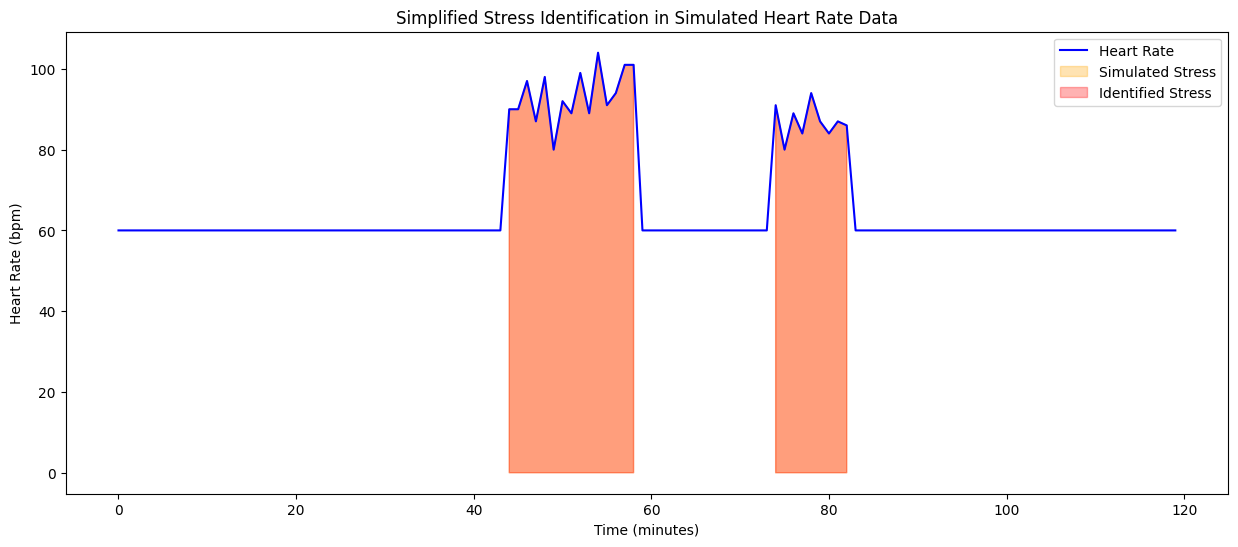

In [12]:
# Setting the seed for reproducibility
np.random.seed(0)

# Re-defining the simplified data generation and analysis functions
def generate_simplified_heart_rate_data(duration, baseline_hr=60, stress_hr=90):
    """
    Generates simplified simulated heart rate data.

    :param duration: Total duration in minutes
    :param baseline_hr: Baseline heart rate (bpm)
    :param stress_hr: Average heart rate during stress (bpm)
    :return: Tuple of (time, heart_rates, stress_type)
    """
    time = np.arange(0, duration, 1)  # Time in minutes
    heart_rates = np.full(duration, baseline_hr)
    stress_type = np.full(duration, 'No Stress')

    # Simulating stress periods
    for _ in range(3):
        start = np.random.randint(0, duration - 20)
        end = start + np.random.randint(5, 20)
        heart_rates[start:end] = np.random.normal(stress_hr, 7, end - start)
        stress_type[start:end] = 'Stress'

    return time, heart_rates, stress_type

def analyze_for_stress(heart_rates, stress_threshold=80):
    """
    Analyzes the heart rate data to identify potential stress periods.

    :param heart_rates: Array of heart rate values
    :param stress_threshold: Threshold for stress identification
    :return: Array of identified stress types
    """
    identified_stress = ['Stress' if hr >= stress_threshold else 'No Stress' for hr in heart_rates]
    return identified_stress

# Generate simplified heart rate data for a duration of 120 minutes
time, heart_rates, simulated_stress_type = generate_simplified_heart_rate_data(120)

# Analyze the simulated heart rate data
identified_stress = analyze_for_stress(heart_rates)

# Plotting the simulated and identified stress periods
plt.figure(figsize=(15, 6))
plt.plot(time, heart_rates, label='Heart Rate', color='blue')
plt.fill_between(time, heart_rates, where=np.array(simulated_stress_type)=='Stress', color='orange', alpha=0.3, label='Simulated Stress')
plt.fill_between(time, heart_rates, where=np.array(identified_stress)=='Stress', color='red', alpha=0.3, label='Identified Stress')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Simplified Stress Identification in Simulated Heart Rate Data')
plt.legend()
plt.show()


In [4]:
def analyze_for_stress_binary(heart_rates, stress_threshold=80):
    """
    Analyzes the heart rate data to identify potential stress periods and converts to binary.

    :param heart_rates: Array of heart rate values
    :param stress_threshold: Threshold for stress identification
    :return: Array of identified stress types in binary (0 for 'No Stress', 1 for 'Stress')
    """
    binary_stress = [1 if hr >= stress_threshold else 0 for hr in heart_rates]
    return binary_stress

# Analyze the simulated heart rate data and convert to binary
binary_stress = analyze_for_stress_binary(heart_rates)

# Output the first 20 entries as a sample
binary_stress[:20]

NameError: name 'heart_rates' is not defined

In [ ]:
# plt.savefig(img_path + 'translation_confusion_matrix.png', dpi=300, bbox_inches='tight')

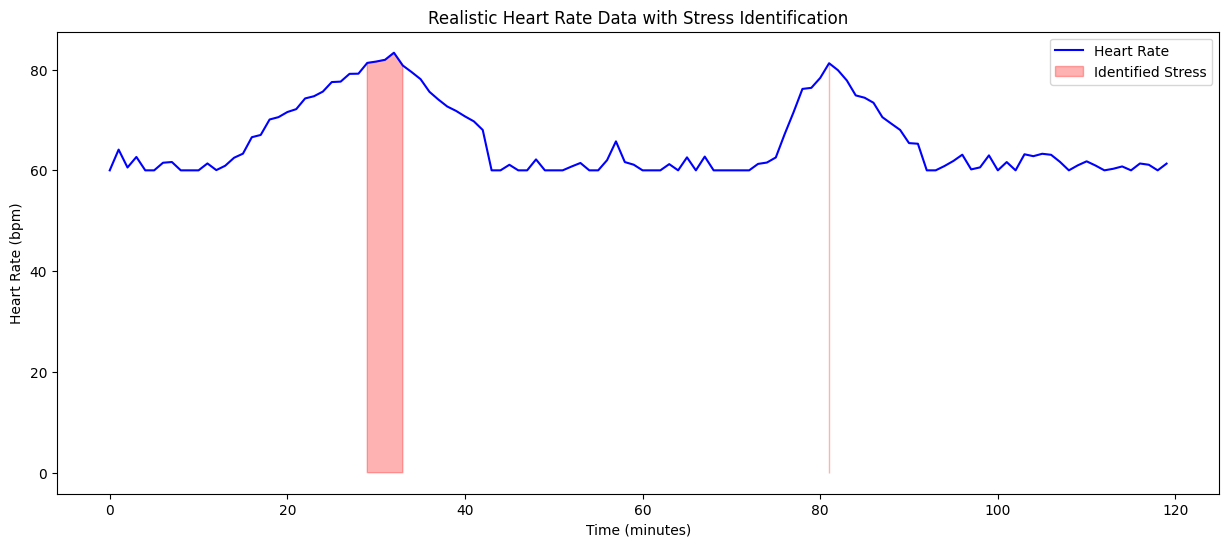

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [21]:
# Setting the seed for reproducibility
np.random.seed(99)

def generate_realistic_heart_rate_data(duration, baseline_hr=60, stress_hr=90):
    """
    Generates more realistic simulated heart rate data with variability.

    :param duration: Total duration in minutes
    :param baseline_hr: Average baseline heart rate (bpm)
    :param stress_hr: Average heart rate during stress (bpm)
    :return: Tuple of (time, heart_rates)
    """
    time = np.arange(0, duration, 1)  # Time in minutes
    heart_rates = np.random.normal(baseline_hr, 2, duration)  # Adding variability to baseline heart rate

    # Simulating stress periods with smoother transitions
    for _ in range(3):
        start = np.random.randint(0, duration - 20)
        end = start + np.random.randint(5, 20)
        # Gradual increase to stress heart rate
        for i in range(start, end):
            heart_rates[i] = heart_rates[i - 1] + np.random.uniform(0, (stress_hr - baseline_hr) / (end - start))
        # Gradual decrease back to baseline heart rate
        for i in range(end, min(end + 10, duration)):
            heart_rates[i] = heart_rates[i - 1] - np.random.uniform(0, (stress_hr - baseline_hr) / 10)

    return time, np.clip(heart_rates, baseline_hr, None)  # Clipping to ensure heart rate doesn't go below baseline

# Generate more realistic heart rate data
time, realistic_heart_rates = generate_realistic_heart_rate_data(120)

# Analyze the realistic heart rate data and convert to binary
binary_stress_realistic = analyze_for_stress_binary(realistic_heart_rates)

# Plotting the realistic heart rate data
plt.figure(figsize=(15, 6))
plt.plot(time, realistic_heart_rates, label='Heart Rate', color='blue')
plt.fill_between(time, realistic_heart_rates, where=np.array(binary_stress_realistic)==1, color='red', alpha=0.3, label='Identified Stress')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Realistic Heart Rate Data with Stress Identification')
plt.legend()
plt.show()

# Output the first 20 entries of the binary stress data as a sample
binary_stress_realistic[:20]


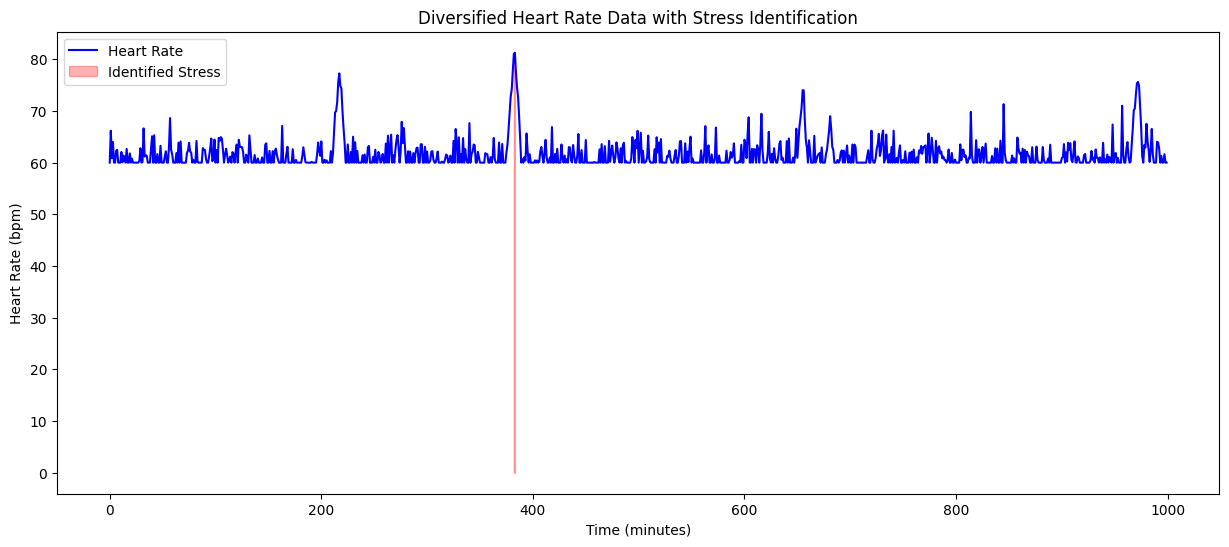

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
# Setting the seed for reproducibility
np.random.seed(99)

def generate_diversified_heart_rate_data(duration, baseline_hr=60, stress_hr_range=(80, 100)):
    """
    Generates diversified and more randomized heart rate data with smoother transitions.

    :param duration: Total duration in minutes
    :param baseline_hr: Average baseline heart rate (bpm)
    :param stress_hr_range: Tuple representing the range of heart rates during stress (bpm)
    :return: Tuple of (time, heart_rates)
    """
    time = np.arange(0, duration, 1)  # Time in minutes
    heart_rates = np.random.normal(baseline_hr, 3, duration)  # Adding variability to baseline heart rate

    # Simulating more frequent and varied stress periods with smoother transitions
    for _ in range(6):  # Increased number of stress periods
        start = np.random.randint(0, duration - 10)
        end = start + np.random.randint(3, 10)  # Shorter stress periods
        stress_hr = np.random.uniform(*stress_hr_range)  # Random stress heart rate within range

        # Gradual increase to stress heart rate
        for i in range(start, end):
            heart_rates[i] = heart_rates[i - 1] + np.random.uniform(0, (stress_hr - baseline_hr) / (end - start))

        # Gradual decrease back to baseline heart rate
        for i in range(end, min(end + 5, duration)):
            heart_rates[i] = heart_rates[i - 1] - np.random.uniform(0, (stress_hr - baseline_hr) / 5)

    return time, np.clip(heart_rates, baseline_hr, None)  # Clipping to ensure heart rate doesn't go below baseline

# Generate diversified heart rate data
time, diversified_heart_rates = generate_diversified_heart_rate_data(1000)

# Analyze the diversified heart rate data and convert to binary
binary_stress_diversified = analyze_for_stress_binary(diversified_heart_rates)

# Plotting the diversified heart rate data
plt.figure(figsize=(15, 6))
plt.plot(time, diversified_heart_rates, label='Heart Rate', color='blue')
plt.fill_between(time, diversified_heart_rates, where=np.array(binary_stress_diversified)==1, color='red', alpha=0.3, label='Identified Stress')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Diversified Heart Rate Data with Stress Identification')
plt.legend()
plt.show()

# Output the first 20 entries of the binary stress data as a sample
binary_stress_diversified[:20]


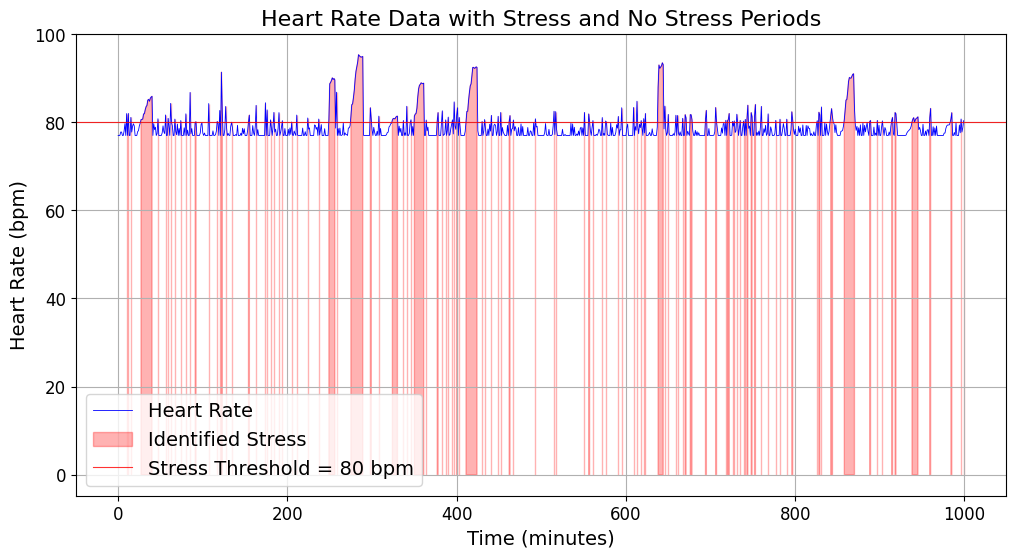

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Setting the seed for reproducibility
np.random.seed(55)

def generate_more_varied_heart_rate_data(duration, baseline_hr=77, stress_hr_range=(80, 116)):
    """
    Generates heart rate data with a better variance of stress and no stress periods.

    :param duration: Total duration in minutes
    :param baseline_hr: Average baseline heart rate (bpm)
    :param stress_hr_range: Tuple representing the range of heart rates during stress (bpm)
    :return: Tuple of (time, heart_rates)
    """
    time = np.arange(0, duration, 1)  # Time in minutes
    heart_rates = np.random.normal(baseline_hr, 3, duration)  # Adding variability to baseline heart rate

    # Simulating frequent and varied stress periods
    for _ in range(10):  # More frequent stress periods
        start = np.random.randint(0, duration - 10)
        end = start + np.random.randint(2, 15)  # Varied length stress periods
        stress_hr = np.random.uniform(*stress_hr_range)  # Random stress heart rate within range

        # Gradual increase to stress heart rate
        for i in range(start, end):
            increment = np.random.uniform(0, (stress_hr - heart_rates[i]) / (end - start))
            heart_rates[i] = heart_rates[i - 1] + increment

        # Gradual decrease back to baseline heart rate
        for i in range(end, min(end + 5, duration)):
            decrement = np.random.uniform(0, (heart_rates[i] - baseline_hr) / 5)
            heart_rates[i] = heart_rates[i - 1] - decrement

    return time, np.clip(heart_rates, baseline_hr, None)  # Clipping to ensure heart rate doesn't go below baseline

def analyze_for_stress_binary(heart_rates, stress_threshold=80):
    """
    Analyzes the heart rate data to identify potential stress periods and converts to binary.

    :param heart_rates: Array of heart rate values
    :param stress_threshold: Threshold for stress identification
    :return: Array of identified stress types in binary (0 for 'No Stress', 1 for 'Stress')
    """
    binary_stress = [1 if hr >= stress_threshold else 0 for hr in heart_rates]
    return binary_stress

# Generate heart rate data with more varied stress
time, more_varied_heart_rates = generate_more_varied_heart_rate_data(1000)

# Analyze the more varied heart rate data and convert to binary
binary_stress_more_varied = analyze_for_stress_binary(more_varied_heart_rates)

# Plotting the more varied heart rate data
plt.figure(figsize=(12, 6))
plt.plot(time, more_varied_heart_rates, label='Heart Rate', color='blue', linewidth=0.6)
plt.fill_between(time, more_varied_heart_rates, where=np.array(binary_stress_more_varied)==1, color='red', alpha=0.3, label='Identified Stress')
plt.axhline(y=80, color='r', alpha=0.8, linestyle='-', label='Stress Threshold = 80 bpm', linewidth=0.8)
plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Heart Rate (bpm)', fontsize=14)
plt.title('Heart Rate Data with Stress and No Stress Periods', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

plt.savefig(img_path + 'simulated_hr_stress_data.png', dpi=300, bbox_inches='tight')
plt.show()

# Output the first 20 entries of the binary stress data as a sample
binary_stress_more_varied[:20]


In [26]:
# Calculating the ratio of '0's (No Stress) to '1's (Stress) in the 1000 samples
no_stress_count = binary_stress_more_varied.count(0)
stress_count = binary_stress_more_varied.count(1)

# Ratio calculation
no_stress_ratio = no_stress_count / len(binary_stress_more_varied)
stress_ratio = stress_count / len(binary_stress_more_varied)

no_stress_ratio, stress_ratio

(0.769, 0.231)

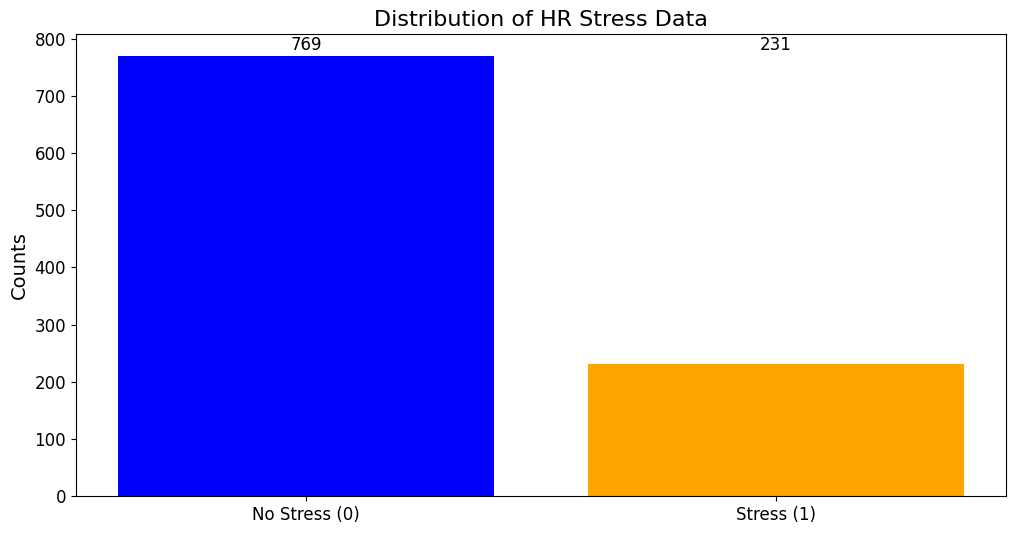

In [24]:
# Adding counts to the bars in the bar chart

values = [0, 1]
counts = [no_stress_count, stress_count]

# Recreating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(values, counts, color=['blue', 'orange'])
plt.title('Distribution of HR Stress Data', fontsize=16)
plt.ylabel('Counts', fontsize=14)
plt.xticks(values, ['No Stress (0)', 'Stress (1)'], fontsize=12)
plt.yticks(fontsize=12)
# plt.grid()

# Adding the counts on top of each bar
for i in range(len(counts)):
    plt.text(i, 780, str(counts[i]), ha='center', fontsize=12)

# Show the plot with numbers on bars
plt.savefig(img_path + 'distribution_hr_stress_data.png', dpi=300, bbox_inches='tight')
plt.show()